# 1. Load dataset 

In [44]:
import pandas as pd
df = pd.read_csv('merged_data.csv')
df.head()

,review,sentiment
0,"For Daniel Auteuil, `Queen Margot' was much be...",negative
1,Spoilers abound. You have been warned.<br /><b...,negative
2,"Where do I start? The plot of the movie, which...",negative
3,There was a genie played by Shaq His name was ...,negative
4,Its a very good comedy movie.Ijust liked it.I ...,positive


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [46]:
df.describe()

,review,sentiment
count,1000,1000
unique,1000,2
top,"For Daniel Auteuil, `Queen Margot' was much be...",negative
freq,1,500


In [47]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [48]:
df['review']

0      For Daniel Auteuil, `Queen Margot' was much be...
1      Spoilers abound. You have been warned.<br /><b...
2      Where do I start? The plot of the movie, which...
3      There was a genie played by Shaq His name was ...
4      Its a very good comedy movie.Ijust liked it.I ...
                             ...                        
995    A quiet, sweet and beutifully nostalgic movie ...
996    First of all, I believe that this movie is muc...
997    Reeves plays Haji Murad, a hero in 1850's Russ...
998    The Williams family live on a ranch located in...
999    Now this is more like it! The first movie had ...
Name: review, Length: 1000, dtype: object

# 3. Preprocessing

In [49]:
import contractions
from bs4 import BeautifulSoup
from nltk . stem import WordNetLemmatizer
from nltk . corpus import stopwords
import re
import string
import nltk
nltk . download('stopwords')
nltk . download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Dao Thi
[nltk_data]     Huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dao Thi
[nltk_data]     Huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
duplicated_df = df[df.duplicated()]
print(duplicated_df)

Empty DataFrame
Columns: [review, sentiment]
Index: []


In [51]:
df = df.drop_duplicates()

In [52]:
df.describe()

,review,sentiment
count,1000,1000
unique,1000,2
top,"For Daniel Auteuil, `Queen Margot' was much be...",negative
freq,1,500


## Data Cleaning

In [53]:
stop = set(stopwords.words('english'))

In [54]:
# "I'm" → "I am"
def expand_contractions(text):
    return contractions.fix(text)

In [55]:
def preprocess_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = expand_contractions(text)
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re. UNICODE)
    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '. ', text)  # add space after full stop
    text = re.sub(r'http\S+', '', text)  # remove urls
    text = "". join([word.lower()
                     for word in text if word not in string.punctuation])
    text = " ". join([wl.lemmatize(word) for word in text.split()
                     if word not in stop and word.isalpha()])
    return text

In [56]:
df['review'][0]

"For Daniel Auteuil, `Queen Margot' was much better. For Nastassja Kinski, `Paris, Texas' was much better. The biggest disappointments were from Chris Menges (`CrissCross' and `A World Apart' cannot even be compared with this one), and Goran Bregovic for use of a version of the same musical theme from `Queen Margot' for this movie (Attention to the end of the film). If this was an American pop movie, I would not feel surprised at all; but for a European film with more independent actors and director, a similar common approach about child abuse with no original insight is very simple-minded and disappointing. There are those bad guys who kidnap and sell the underage people. There are those poor children who hate people selling them and wait to be saved by someone. And finally, there is that big hero who kills all the bad guys and saves these poor children from bad guys. Every character is shown in simple black and white terms: the good versus the evil. Plus, from the very beginning, I c

In [57]:
preprocess_text(df['review'][0])

'daniel auteuil queen margot much better nastassja kinski paris texas much better biggest disappointment chris menges crisscross world apart cannot even compared one goran bregovic use version musical theme queen margot movie attention end film american pop movie would feel surprised european film independent actor director similar common approach child abuse original insight simpleminded disappointing bad guy kidnap sell underage people poor child hate people selling wait saved someone finally big hero kill bad guy save poor child bad guy every character shown simple black white term good versus evil plus beginning could understand story would end end history child sexual abuse believe difficult issue child molestation paedophilia much complex portrayed original movie think movie disturbing disappointing'

In [58]:
df['review'] = df['review'].apply(preprocess_text)

In [59]:
df['review']

0      daniel auteuil queen margot much better nastas...
1      spoiler abound warned thoroughly disappointed ...
2      start plot movie love two high school student ...
3      genie played shaq name kazaam whack rhyme corn...
4      good comedy movie ijust liked know love movie ...
                             ...                        
995    quiet sweet beutifully nostalgic movie confron...
996    first believe movie much appreciated viewer ac...
997    reef play haji murad hero russia badly dubbed ...
998    williams family live ranch located middle remo...
999    like first movie iffy dialogue weaker acting s...
Name: review, Length: 1000, dtype: object

# 4. EDA

## Label

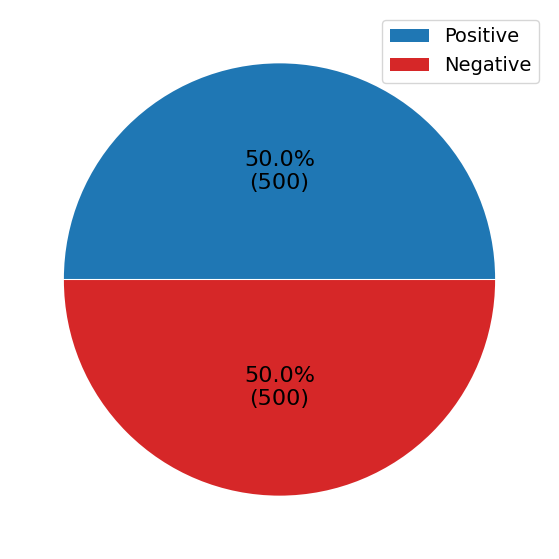

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating autocpt arguments


def func(pct, allvalues):
    absolute = int(pct / 100.0 * np.sum(allvalues))
    return "{:.1f}%\n({:d})". format(pct, absolute)


freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']
# Create pie chart
pie, ax = plt . subplots(figsize=[11, 7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[
        0.0025]*2, pctdistance=0.5, colors=[sns. color_palette()[0], 'tab:red'], textprops={'fontsize': 16})
# plt.title ( '  Frequencies of sentiment labels ' , fontsize =14 , fontweight = '  bold ' )
labels = [r'Positive', r'Negative']
plt . legend(labels, loc="best", prop={'size': 14})
pie . savefig("PieChart.png")
plt . show()

## Text

In [61]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len
df_temp

,review,sentiment,words length
0,daniel auteuil queen margot much better nastas...,negative,117
1,spoiler abound warned thoroughly disappointed ...,negative,115
2,start plot movie love two high school student ...,negative,163
3,genie played shaq name kazaam whack rhyme corn...,negative,71
4,good comedy movie ijust liked know love movie ...,positive,167
...,...,...,...
995,quiet sweet beutifully nostalgic movie confron...,positive,49
996,first believe movie much appreciated viewer ac...,positive,98
997,reef play haji murad hero russia badly dubbed ...,negative,98
998,williams family live ranch located middle remo...,positive,146


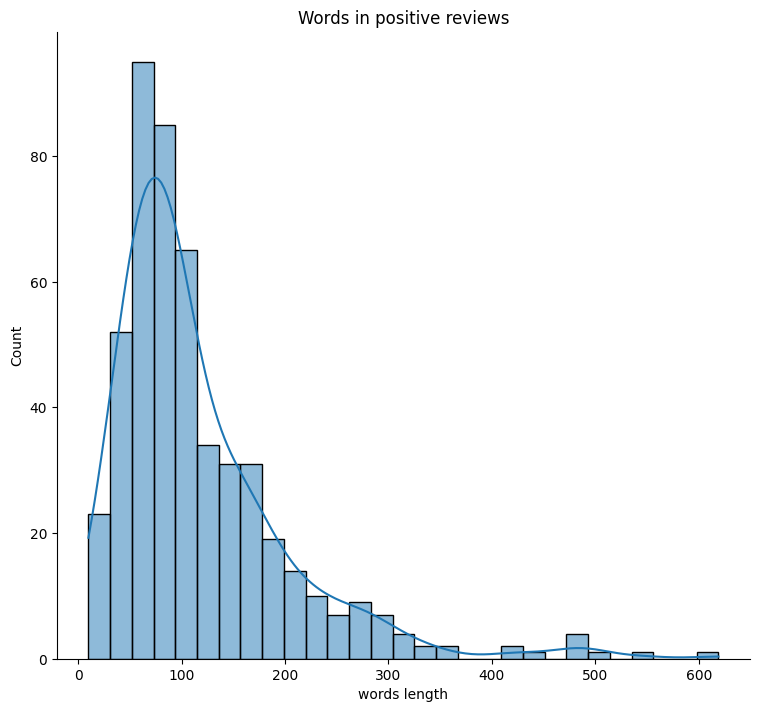

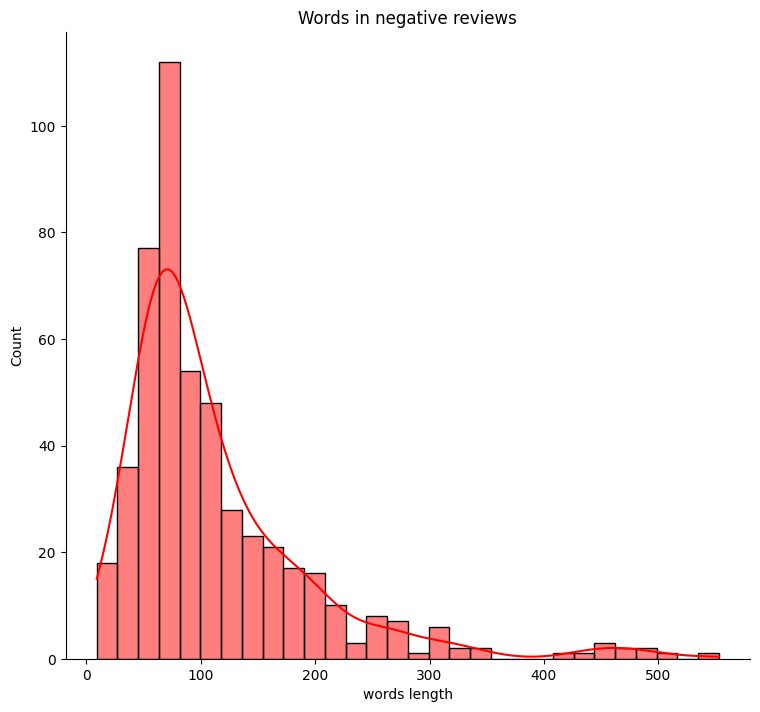

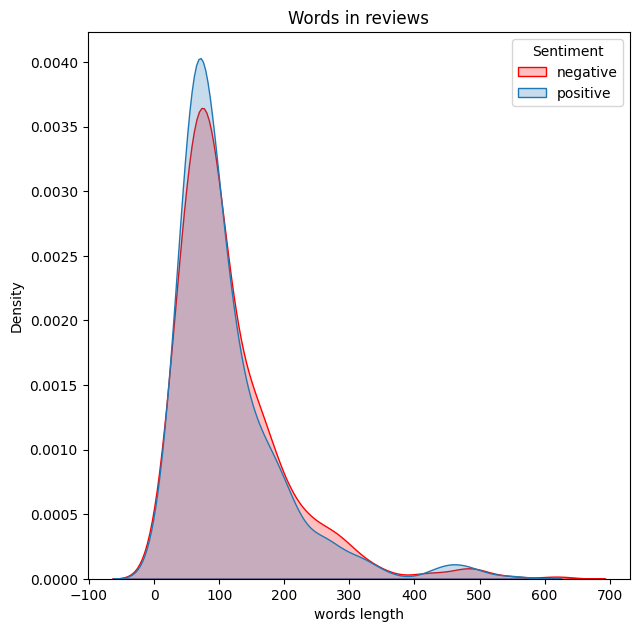

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


# Biểu đồ cho đánh giá tích cực
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show()

# Biểu đồ cho đánh giá tiêu cực
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False, palette=['red']
).set(title='Words in negative reviews')
plt.show()

# Biểu đồ phân phối từ
plt.figure(figsize=(7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show()

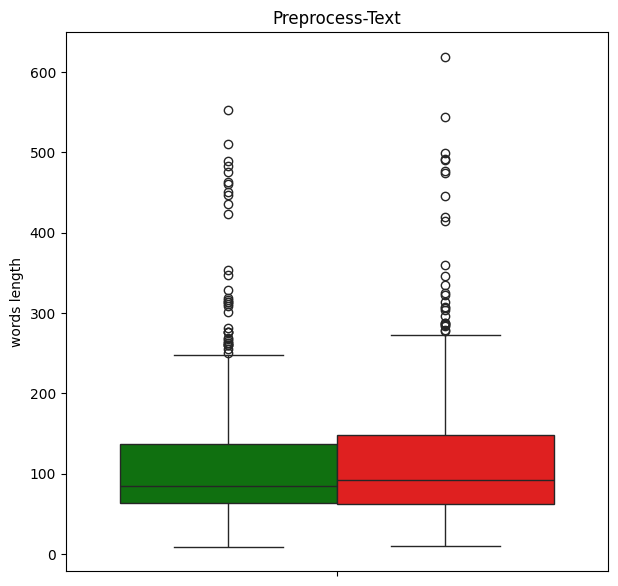

In [63]:
fig, ax = plt.subplots(figsize=(7, 7))
box_plot = sns.boxplot(
    hue="sentiment", y='words length', data=df_temp, palette=['green', 'red'], legend=False
).set(title='Preprocess-Text')
plt.show(box_plot)

In [64]:
from collections import Counter
words = ' '.join(df['review']).split()
counter = Counter(words)
most = counter.most_common()
vocabs, word_counts = [], []
for word, count in most:
    if (word not in stop):
        vocabs.append(word)
        word_counts.append(count)

In [65]:
most[:10]

[('movie', 2057),
 ('film', 1899),
 ('one', 1095),
 ('like', 836),
 ('would', 658),
 ('character', 638),
 ('time', 636),
 ('good', 590),
 ('make', 509),
 ('even', 490)]

Text(0.5, 1.0, 'Most Common Word In Job Description')

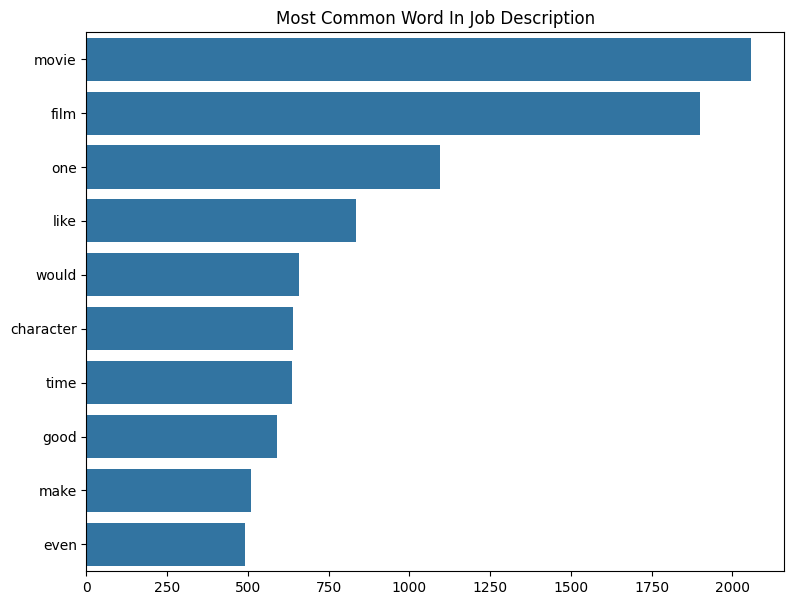

In [66]:
plt.figure(figsize=(9, 7))
sns.barplot(x=word_counts[:10], y=vocabs[:10])
plt.title("Most Common Word In Job Description")

In [67]:
word_count_df = pd.DataFrame({
    'word': vocabs,
    'word_count': word_counts
})

In [68]:
word_count_df

,word,word_count
0,movie,2057
1,film,1899
2,one,1095
3,like,836
4,would,658
...,...,...
17101,morrills,1
17102,iffy,1
17103,brimming,1
17104,madcap,1


# Text Encoding

In [69]:
from sklearn . model_selection import train_test_split
from sklearn . feature_extraction . text import TfidfVectorizer
from sklearn . preprocessing import LabelEncoder

label_encode = LabelEncoder()
x_data = df['review']
y_data = label_encode.fit_transform(df['sentiment'])
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42)

In [123]:
tfidf_vectorizer = TfidfVectorizer(max_features=70)
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

In [124]:
x_train_encoded.shape

(800, 70)

In [125]:
x_train_encoded[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (1, 70)>

In [126]:
# In câu gốc
print("Câu gốc:", x_train.iloc[11])

# Lấy từ vựng và giá trị TF-IDF của câu đầu tiên
feature_names = tfidf_vectorizer.get_feature_names_out()
non_zero_indices = x_train_encoded[11].nonzero()[1] 
non_zero_values = x_train_encoded[11].data

# In các từ và giá trị TF-IDF
print("Các từ và điểm TF-IDF:")
for idx, value in zip(non_zero_indices, non_zero_values):
    print(f"Từ: {feature_names[idx]}, TF-IDF: {value}")

Câu gốc: freddys dead final nightmare last film feature freddy krueger solo act entity costar year killing taken toll upon town springwood gotten point little city become virtual ghost town parent killed freddy krueger many year ago paid ultimate price mad inhabit town survivor scattered everywhere stop freddy seeking final revenge matter try stop always come back time find little old life kid finally stop freddy good secret buried freddys twisted mind find watch freddys dead end originally filmed fitting way end franchise freddy learns something perverted life get go bang lisa zane yaphet kotto freddy krueger star final installment rosanne tom arnold johnny depp make special appearance whole lot better last one filled dated joke enjoy series want miss one recommend movie freddy fan
Các từ và điểm TF-IDF:
Từ: back, TF-IDF: 0.18124932406898586
Từ: better, TF-IDF: 0.17300467882671502
Từ: come, TF-IDF: 0.1629488694835385
Từ: end, TF-IDF: 0.33471746723568446
Từ: film, TF-IDF: 0.09522221543

In [127]:
y_train[11]

1

# Classifier

In [128]:
from sklearn . tree import DecisionTreeClassifier
from sklearn . metrics import accuracy_score


## Decision Tree

In [143]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [144]:
y_pred = dt_classifier.predict(x_test_encoded)

In [145]:
accuracy_score(y_pred, y_test)

0.61

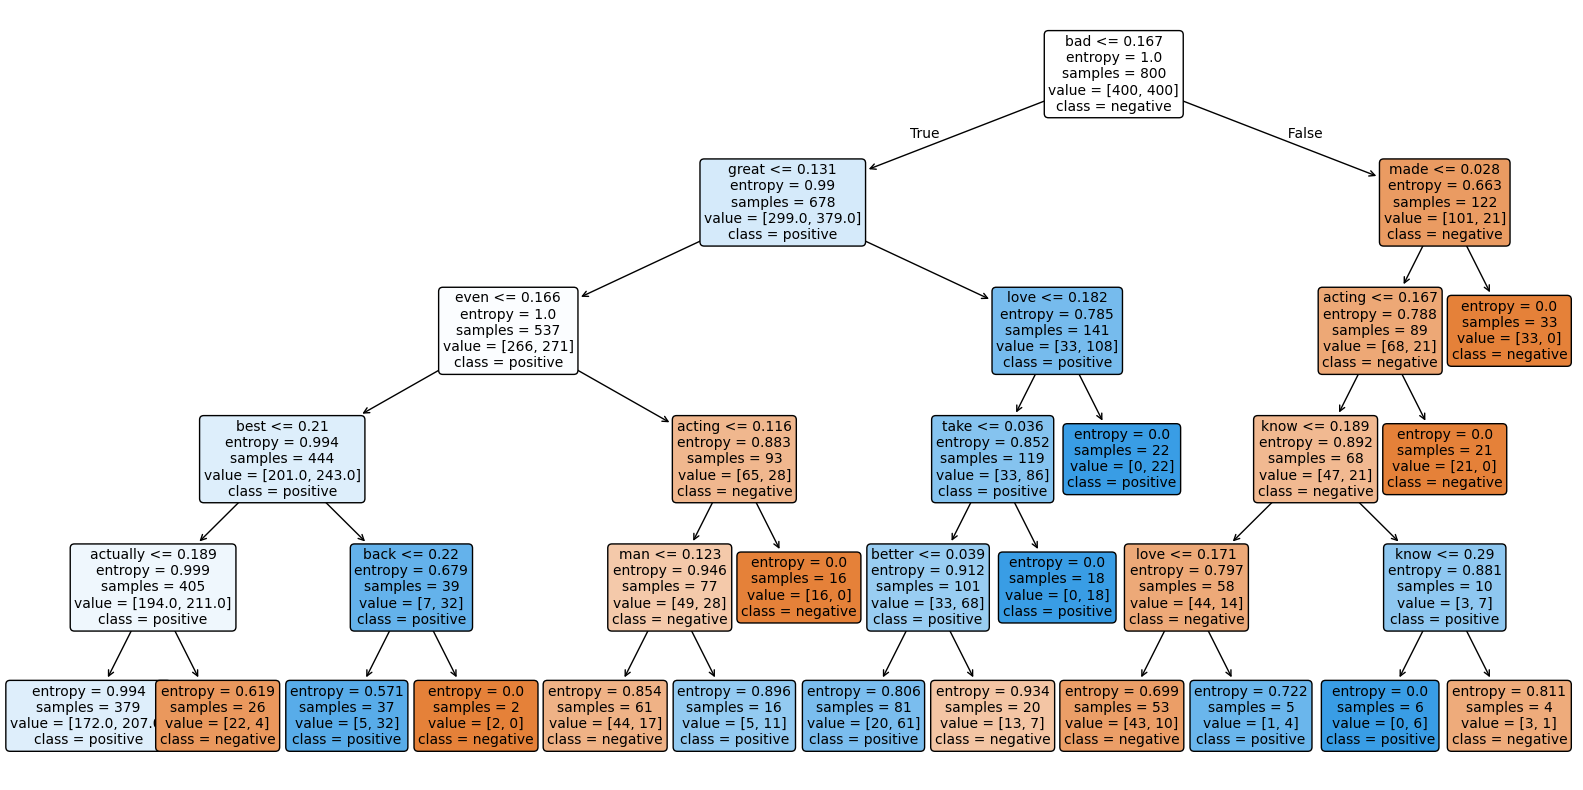

In [146]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Thiết lập kích thước hình ảnh (vì cây có thể lớn)
plt.figure(figsize=(20, 10))

# Vẽ cây quyết định
plot_tree(dt_classifier, 
          feature_names=tfidf_vectorizer.get_feature_names_out(),  # Tên các đặc trưng (từ vựng TF-IDF)
          class_names=['negative', 'positive'],                    # Tên các lớp
          filled=True,                                            # Tô màu các nút
          rounded=True,                                           # Bo tròn viền nút
          fontsize=10)                                            # Cỡ chữ

# Hiển thị biểu đồ
plt.show()

In [221]:
sample_test = x_test_encoded[0].reshape(1, -1)  # Định dạng lại để có dạng (1, số_feature)
prediction = dt_classifier.predict(sample_test)
label_encode.inverse_transform(prediction)

array(['positive'], dtype=object)

# Decision tree (Tự xây dựng)

In [136]:
tfidf_vectorizer.get_feature_names_out()

array(['acting', 'actor', 'actually', 'also', 'another', 'back', 'bad',
       'best', 'better', 'character', 'come', 'could', 'director', 'end',
       'even', 'ever', 'every', 'fact', 'film', 'find', 'first', 'get',
       'give', 'go', 'good', 'great', 'guy', 'know', 'life', 'like',
       'little', 'look', 'lot', 'love', 'made', 'make', 'man', 'many',
       'movie', 'much', 'never', 'old', 'one', 'part', 'people', 'plot',
       'real', 'really', 'say', 'scene', 'see', 'seen', 'show',
       'something', 'still', 'story', 'take', 'thing', 'think', 'though',
       'time', 'two', 'want', 'watch', 'watching', 'way', 'well', 'work',
       'would', 'year'], dtype=object)

In [234]:
from collections import deque

In [257]:
class Node:
    def __init__(self, x,y, depth = 0, max_depth = 5):
        self.depth = depth  
        self.max_depth = max_depth
        self.sample = x.shape[0]     # Số lượng mẫu tại node
        self.entropy = self.set_entropy(y)    # Giá trị entropy của node
        self.values = [np.sum(y != 1), np.sum(y == 1)]      # Phân phối nhãn của các mẫu
        self.condition = self.set_condition(x,y)
        self.prediction = "positive" if self.values[0] < self.values[1] else "negative"
        self.left, self.right = self.set_left_right(x,y)
        

    def __repr__(self):
        left_sample = 0
        right_sample = 0
        if (self.left != None and self.right != None):
            left_sample = self.left.sample
            right_sample = self.right.sample

        return f"Node(depth = {self.depth}, entropy={self.entropy:.4f}, condition={self.condition}, predict={self.prediction}, sample={self.sample}, values={self.values}, left={left_sample}, right={right_sample})"

    def set_entropy(self,y):
        p_pos = np.mean(y == 1) 
        p_neg = 1 - p_pos 
        entropy = 0
        if(p_pos != 0 and p_neg != 0):
            entropy = -p_pos*np.log2(p_pos) - p_neg*np.log2(p_neg)
        return entropy

    def set_condition(self,x,y):
        if(self.entropy == 0):
            return None,None    # không cần tách thành 2 nhánh
        max_IG = -10 
        thres_select = None
        best_feature = None
        for w in tfidf_vectorizer.get_feature_names_out():
            w_idx = tfidf_vectorizer.vocabulary_[w]
            w_values = x[:, w_idx].toarray().flatten()
            w_list = np.unique(w_values)
            w_thres = [(w_list[i-1]+w_list[i])/2 for i in range(1, len(w_list))]
            # if(len(w_thres) == 0):
            #     print(f" {w_list} : None ")

            for thres in w_thres:
                # Tạo mask (mảng boolean) để tách dữ liệu
                mask = w_values <= thres

                # Tách x_train_encoded thành 2 tập
                x_left, x_right = x[mask], x[~mask]
                y_left, y_right = y[mask], y[~mask]

                # Số sample 
                S_left = x_left.shape[0]
                S_right = x_right.shape[0]
                

                # Tính entropy, IG 
                E_left, E_right = self.set_entropy(y_left), self.set_entropy(y_right)
                IG = self.entropy - (S_left / self.sample) * E_left - (S_right / self.sample) * E_right

                # update
                if IG > max_IG:
                    max_IG, thres_select, best_feature = IG, thres, w
        
        return (best_feature, thres_select)

    def set_left_right(self, x, y):
        feature, thres = self.condition
        if(feature == None or thres == None or self.depth >= self.max_depth):
            return None, None 
        feature_idx = tfidf_vectorizer.vocabulary_[feature]  # Lấy chỉ mục của từ
        w_values = x[:, feature_idx].toarray().flatten()  # Trích xuất dữ liệu

        mask = w_values <= thres
        x_left, y_left = x[mask], y[mask]
        x_right, y_right = x[~mask], y[~mask] 

        # if x_left.shape[0] > 0 and x_right.shape[0] > 0:
        return Node(x_left, y_left, self.depth + 1, self.max_depth), Node(x_right, y_right, self.depth + 1, self.max_depth)
    
    def predict(self, x_test):
        if self.left is None or self.right is None:  # Nếu là lá => Dự đoán luôn
            return self.prediction  

        feature, thres = self.condition
        feature_idx = tfidf_vectorizer.vocabulary_[feature]  
        feature_value = x_test[0, feature_idx]  

        if feature_value <= thres:
            return self.left.predict(x_test)
        else:
            return self.right.predict(x_test)

    def predict_batch(self, x_test):
        predictions = []
        for i in range(x_test.shape[0]):  # Duyệt từng hàng trong x_test
            prediction = self.predict(x_test[i])
            predictions.append(prediction)
        return np.array(predictions)  # Trả về mảng dự đoán
    
    def print_tree(self):
        queue = deque([self])  # Hàng đợi BFS bắt đầu từ node gốc
        while queue:
            node = queue.popleft()
            if node is not None:  # Nếu node không phải None
                print(node)  
                queue.append(node.left)
                queue.append(node.right)

In [258]:
# Huấn luyện cây với dữ liệu
tree = Node(x_train_encoded, y_train, max_depth=5)

In [259]:
tree.print_tree()

Node(depth = 0, entropy=1.0000, condition=('bad', 0.16706679560579424), predict=negative, sample=800, values=[400, 400], left=678, right=122)
Node(depth = 1, entropy=0.9899, condition=('great', 0.1314287518278302), predict=positive, sample=678, values=[299, 379], left=537, right=141)
Node(depth = 1, entropy=0.6626, condition=('made', 0.028117802953479355), predict=negative, sample=122, values=[101, 21], left=89, right=33)
Node(depth = 2, entropy=0.9999, condition=('even', 0.16579968481103033), predict=positive, sample=537, values=[266, 271], left=444, right=93)
Node(depth = 2, entropy=0.7850, condition=('love', 0.18192527241510392), predict=positive, sample=141, values=[33, 108], left=119, right=22)
Node(depth = 2, entropy=0.7882, condition=('acting', 0.1669232943262775), predict=negative, sample=89, values=[68, 21], left=68, right=21)
Node(depth = 2, entropy=0.0000, condition=(None, None), predict=negative, sample=33, values=[33, 0], left=0, right=0)
Node(depth = 3, entropy=0.9935, co

# Inference

In [268]:
# Dự đoán trên mẫu x_test
sample_test = x_test_encoded[0]  # Lấy một mẫu từ tập test
prediction = tree.predict(sample_test)
print(prediction)

positive


In [267]:
tree_predict = tree.predict_batch(x_test_encoded)
tree_predict_num = np.array([1 if p == "positive" else 0 for p in tree_predict])
accuracy_score(y_test, tree_predict_num)

0.61